In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_excel(r'D:\data science\data science assg\ass.18 Forecasting\Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
df.shape

(96, 1)

# Visualization 

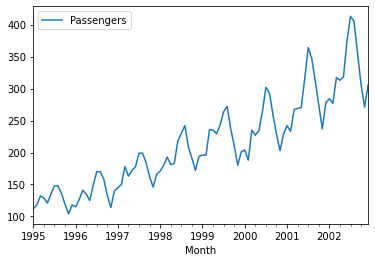

In [4]:
df.plot()
pyplot.show()

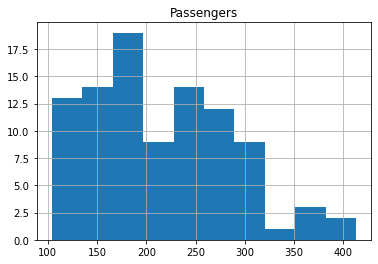

In [5]:
df.hist()
pyplot.show()

# Box and Whisker plot

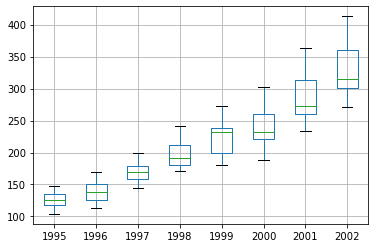

In [6]:
from pandas import Grouper
from pandas import DataFrame
df = pd.read_excel(r'D:\data science\data science assg\ass.18 Forecasting\Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze = True)
groups = df.groupby(Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

# Lag plot

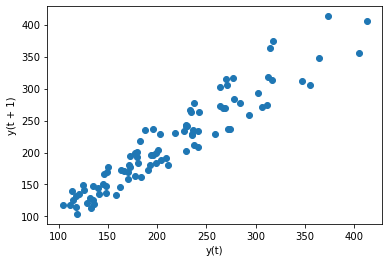

In [7]:
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()

# Autocorrelation

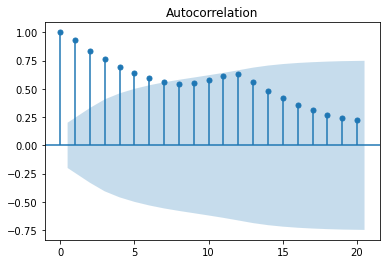

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=20)
pyplot.show()

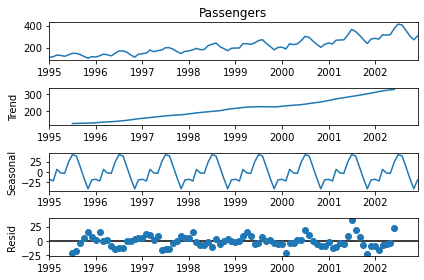

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df, period = 12)
decompose_ts_add.plot()
pyplot.show()

<function matplotlib.pyplot.show(close=None, block=None)>

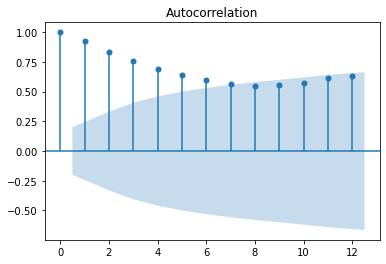

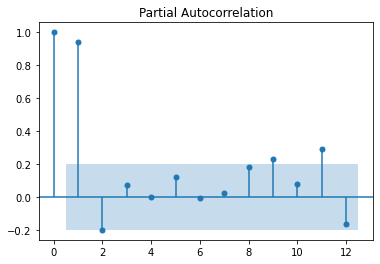

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df, lags = 12)
tsa_plots.plot_pacf(df, lags = 12)
pyplot.show

In [11]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [12]:
Train = df.head(80)
Test = df.tail(16)

<AxesSubplot:xlabel='Month'>

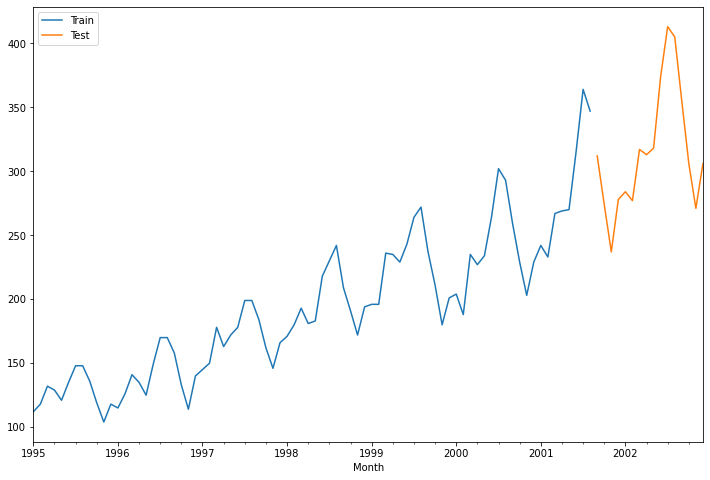

In [13]:
Train.plot(legend=True,label='Train')
Test.plot(legend=True,label='Test',figsize=(12,8))


In [14]:
def rmse(pred):
    rmse = np.sqrt(np.mean((np.array(Test)- np.array(pred))**2))
    return rmse

In [15]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [16]:
# Simple Exponential Method
import warnings
ses_model = SimpleExpSmoothing(Train).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
print('MAPE Value for the Simple Exponential Model is:',MAPE(pred_ses, Test))
print('rmse value for the model is:',rmse(pred_ses))

MAPE Value for the Simple Exponential Model is: 11.375850554268187
rmse value for the model is: 50.8582166265628


C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [17]:
# Holt's Method
hw_model = Holt(Train).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the Holt model is:', MAPE(pred_hw, Test))
print('The rmse value for the model is:', rmse(pred_hw))
print('The rmse value for the model is:', rmse(pred_hw))

The MAPE value for the Holt model is: 51.93443984363068
The rmse value for the model is: 169.3651751827843
The rmse value for the model is: 169.3651751827843


C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-17-8284ae36981e>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train).fit(smoothing_level = 0.8, smoothing_slope = 0.2)


In [18]:
# Holt's WInter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(Train, seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the model is :', MAPE(pred_hw_mul_add, Test))
print('The rmse value for the model is :', rmse(pred_hw_mul_add))

C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


The MAPE value for the model is : 3.2181442853689104
The rmse value for the model is : 14.572444632846995


<AxesSubplot:xlabel='Month'>

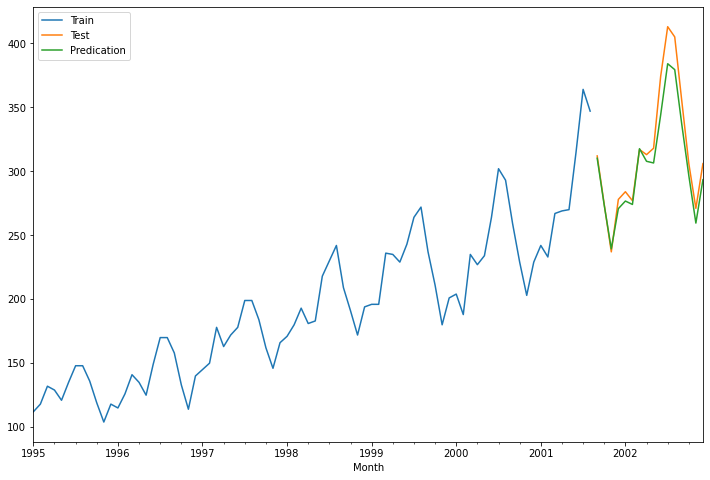

In [19]:
Train.plot(legend=True,label='Train')
Test.plot(legend=True,label='Test',figsize=(12,8))
pred_hw_mul_add.plot(legend=True,label='Predication')

In [20]:
# Holt's Winter exponential smoothing with addaptive seasonality and additive trend
hw_model_add_add = ExponentialSmoothing(Train, seasonal = 'add', trend = 'add', seasonal_periods =12).fit()
pred_hw_add_add = hw_model_add_add.predict(start = Test.index[0], end= Test.index[-1])
print('The MAPE value for the model is:', MAPE(pred_hw_add_add, Test))
print('The rmse value for the model is:', rmse(pred_hw_add_add))

C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


The MAPE value for the model is: 7.60851728441626
The rmse value for the model is: 25.252692820007383


# Forecasting by ARIMA

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
model = SARIMAX(Train, order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91832\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -247.038
Date:                            Sun, 11 Apr 2021   AIC                            504.076
Time:                                    00:44:57   BIC                            515.100
Sample:                                01-01-1995   HQIC                           508.438
                                     - 08-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2154      0.115     -1.878      0.060      -0.440       0.009
ar.S.L12      -1.2163      1.048     -1.161      0.246      -3.269       0.837
ar.S.L24      -0.3637      0.282     -1.290      0.197      -0.916       0.189
ma.S.L12       0.9991    119.606      0.008      0.993    -233.424     235.422
sigma2        83.5108   9904.728      0.008      0.993   -1.93e+04    1.95e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.93   Prob(JB):                         0.34
Heteroskedasticity (H):               2.40   Skew:                             0.43
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

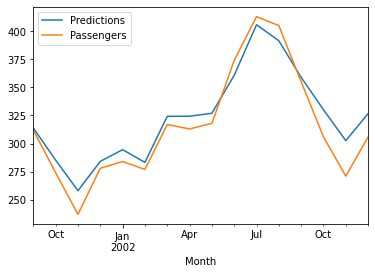

In [22]:
predictions = result.predict(start = Test.index[0], end = Test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
Test.plot(legend = True)

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(Test, predictions)
mean_squared_error(Test, predictions)

215.82472250117183

C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\91832\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

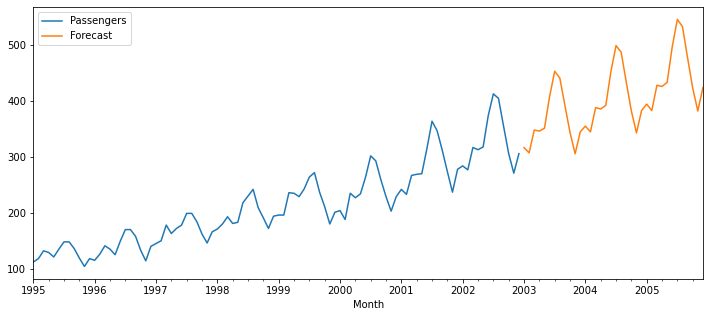

In [24]:
model = model = SARIMAX(df, order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(df), end = (len(df)-1) + 3 * 12, typ = 'levels').rename('Forecast')
df.plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [25]:
forecast.head(10)

2003-01-01    316.743386
2003-02-01    307.410327
2003-03-01    348.259863
2003-04-01    346.336335
2003-05-01    351.479737
2003-06-01    408.177967
2003-07-01    453.447833
2003-08-01    441.368728
2003-09-01    392.262276
2003-10-01    343.660225
Freq: MS, Name: Forecast, dtype: float64

In [26]:
MAPE(predictions, Test)

4.1565422275462724

# From the above table we can say that Holt's Winter Exponential Smoothing with additive seasonality and trend model is best suitable for the Airlines Data